In [57]:

from music21 import *
from IPython.display import Image, display
from PIL import Image as img
from PIL import ImageDraw as imgdraw


def music(info: list, notes: str, midi=False, swing=False):
    s = stream.Score()
    measure = stream.Measure()
    part = stream.Part()
    
    measure_color = False
    
    if notes[0] == "@":
        measure_color = True
        notes = notes.replace("@", "")
    
    if info[0] == "Treble":
        measure.append(clef.TrebleClef())
    elif info[0] == "Bass":
        measure.append(clef.BassClef)
    elif info[0] == "None":
        measure.append(clef.NoClef())
    measure.append(key.KeySignature(info[1]))
    measure.append(meter.TimeSignature(info[2]))

    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            measure.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            measure.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length == "0.3":
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col
            
            if midi and swing:
                for n in measure:
                    if isinstance(n, note.Note) or isinstance(n, note.Rest):
                        if n.duration.quarterLength == 0.5:
                            print(n.name, n.offset)
                            if ".75" in str(n.offset):
                                n.duration.quarterLength = 0.25
                            elif ".0" in str(n.offset) or ".5" in str(n.offset):
                                n.duration.quarterLength = 0.75
            measure.append(add_n)
    
    part.append(measure)
    s.append(part)
    
    if measure_color:
        m = img.open(s.write("musicxml.png"))
        w, h = m.size
        bg = img.new("RGBA", (w, h), (0, 0, 0, 0))
        draw = imgdraw.Draw(bg)
        
        for y in range(h):
            r, g, b, a = m.getpixel((0, y))
            if r == 0 and g == 0 and b == 0 and a != 0:
                start_pixel = y + 2
                break
        for y in reversed(range(h)):
            r, g, b, a = m.getpixel((0, y))
            if r == 0 and g == 0 and b == 0 and a != 0:
                end_pixel = y - 2
                break
        
        x1, y1, x2, y2 = 0, start_pixel, w, end_pixel
        fill_color = (240, 94, 84)
        
        
        draw.rectangle([x1, y1, x2, y2], fill=fill_color)
        final_image = bg.paste(m, mask=m.split()[3])
        
        if midi:
            return s.show("midi")
        else:
            display(bg)
    else:
        if midi:
            return s.show("midi")
        else:
            return Image(filename=s.write("musicxml.png"))

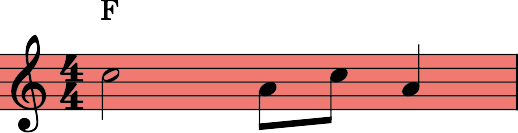

In [58]:

info = ["Treble", 0, "4/4"]
notes = "@!F C5/2 A4/.5 C5/.5 A4/1"
music(info, notes, False, False)